## Capstone Project 2: Milestone Report

### **Predicting Monthly Electricity Sale Revenue of Residential Sector in the United States**

 Benhur Tedros

## Summary

Today in our world, there are many electric power industries, which cover the generation, transmission, distribution and sale of electric power to the general public and industry. As world’s population, commerce and transportations are expected to grow, the demand for electric power will increase and so does the revenues from the electricity sales. Electricity retailing is the end product of the processes of electric power industry. This industry makes a lot of revenues from electric sales to residential, commercial, and industrial, transportation sectors and others. The other sector refers to activities such as Public Street and highway lighting. The U.S. Energy Information Administration (EIA) collects sales of this electricity and associated revenue, each month, from a statistically chosen sample of electric utilities in the United States. Prediction of future sale revenue is helpful in estimating the number of future customers and the megawatt needed. 

The analysis of the sale revenue can help the electric power industry and the government in designing new electric coverage, improving the existing ones and helping their customers better.  State based further prediction would also provide important asset the pertinent institutions.

## Data Loading

The dataset for this project was published by U.S. Energy Information Administration and was downloaded from their website. 
The dataset is comprised of year, month, year_month, data status, Revenue in thousand dollars, Sales in megawatt hours, and price in cents/kwh for residential sector. The data includes the average sal from January 1990 to August 2017. 

## Data Wrangling and Cleaning

The dataset are stored in MS Excel spreadsheet in CSV format, which were easily loaded into pandas dataframes. I did not use much of the data wrangling features, as the dataset was already cleaned and ready to be utilized.It contains 332 observations with 7 data fields with no missing/null values. The dates were converted to datetime index for convienence. Exploratory data analysis was carried out on the dataset. Later, the dataset was checked for non-stationarity pattern,seasonality, trend and noise.

The libraries used in this section include numpy, pandas, matplotlib, scikit-learn and statsmodels.

In [2]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
from matplotlib import dates
from pandas import TimeGrouper
from statsmodels.tsa.stattools import adfuller

C:\Users\benbahtin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone_Project_2\\Dataset\Austin')
os.getcwd()

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone_Project_2\\Dataset\\Austin'

In [16]:
sale_revenue = pd.read_csv('sales_revenue_monthly.csv')
sale_revenue.head()

,year,month,year_month,Data Status,Revenue_dollar,Sales_Mwatt,Price_Centkwh
0,1990,1,1/1990,Final,6841300,95420231,7.169654
1,1990,2,2/1990,Final,5571807,74498370,7.479099
2,1990,3,3/1990,Final,5442934,71901767,7.569959
3,1990,4,4/1990,Final,5015134,65190618,7.693030
4,1990,5,5/1990,Final,5006417,62881008,7.961731


In [25]:
# converting to datetime format
sale_revenue['year_month'] = pd.to_datetime(sale_revenue['year_month'])
sale_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
year              332 non-null int64
month             332 non-null int64
year_month        332 non-null datetime64[ns]
Data Status       332 non-null object
Revenue_dollar    332 non-null int64
Sales_Mwatt       332 non-null int64
Price_Centkwh     332 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 18.2+ KB


### Exploratory Data Analysis

Explaratory data analysis for this dataset is useful in observing the variations of the monthly sale revenue throughout the years (1990-2017), and its statistical distribution.

In [26]:
! pip install ggplot
from ggplot import *

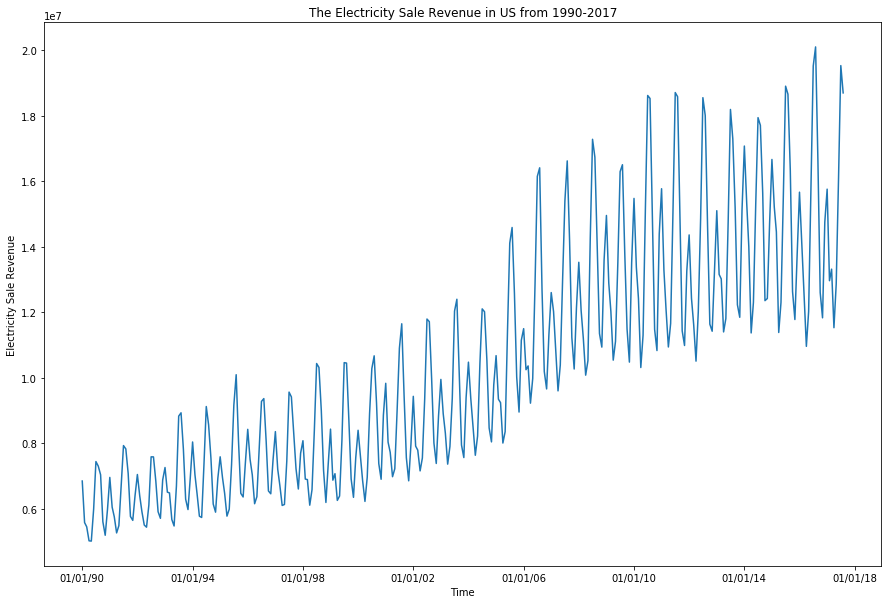

In [29]:
# Let us create dataframe with the time and the revenue dollar 
data_revenue = pd.DataFrame(sale_revenue,columns = ['year_month','Revenue_dollar'])
data_revenue['year_month'] =  pd.to_datetime(data_revenue['year_month'],format='%Y%m%d', errors='coerce')


# plotting the dataset

fig,ax = plt.subplots(figsize=(15,10))

# Changing the x-axis formatting by creating an object of formatter

date_format = '%d/%m/%y'
formatter_date = dates.DateFormatter(date_format)
ax.xaxis.set_major_formatter(formatter_date)

ax.plot(data_revenue['year_month'], data_revenue['Revenue_dollar'])
ax.set_xlabel('Time')
ax.set_ylabel('Electricity Sale Revenue')
ax.set_title('The Electricity Sale Revenue in US from 1990-2017')

It is also helpful to explore the distribution pattern of the dataset using density plot. This may help us when setting up statistical hypothesis tests for checking the normality of the dataset observations.

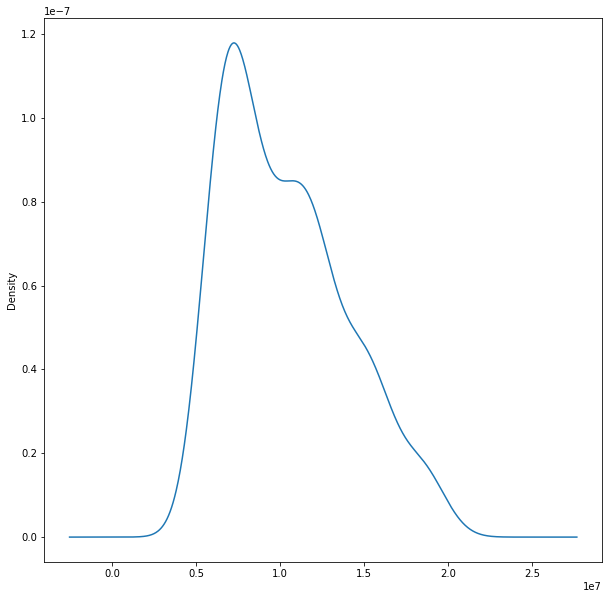

In [18]:
# Density plot for the monthly sale revenue
revenue_density = pd.Series(data_revenue['Revenue_dollar'])
fig, ax = plt.subplots(figsize=(10,10))
revenue_density.plot(kind='kde')

The plot looks a little bit asymmetrical, and the distribution is probably less Gaussian. It may also be interesting to explore the distribution of the average revenue values across months within a year.

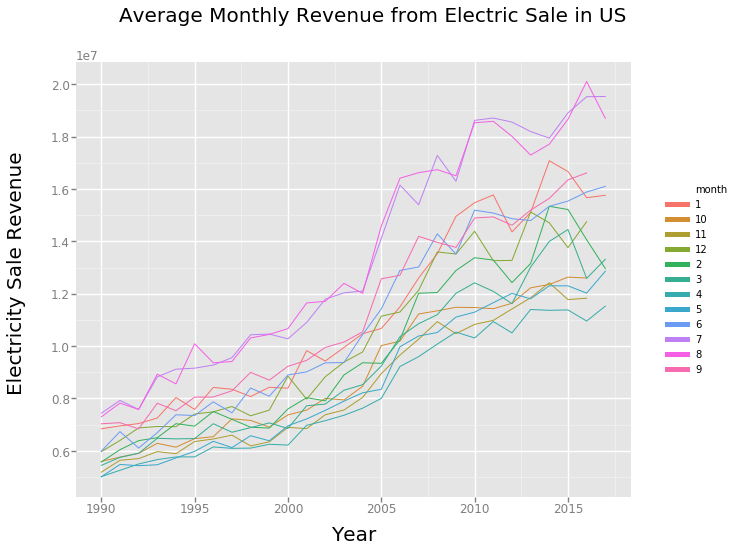

<ggplot: (-9223372009894755829)>

In [8]:
# converting month into series nature for the plotting purposes
sale_revenue['month'] = sale_revenue['month'].astype('str')
sale_revenue_sort = sale_revenue.sort_values(by='month')

# plotting the monthly revenue across the years
b =ggplot(sale_revenue_sort,aes('year','Revenue_dollar',color='month')) + ggtitle(element_text(text='Average Monthly Revenue from Electric Sale in US', size=20)) + \
    xlab(element_text(size=20, text='Year',hjust = -0.025)) + ylab(element_text(size=20, text='Electricity Sale Revenue',vjust = 0.20)) + \
    geom_line(colour = 'month')

b

The above figure shows the variation of the average sale revenue value in the same month across the years of 1990-2017.The monthly revenue from electric sale was appeared to increase with time. The trend from 1990 to 2005 looked to be gradual, while it showed a sharp increase towards 2008. The increasing trend continued gradually until 2012 where it displayed a sharp drop. However, it picked up again towards 2015. Beyond 2015, it looked the trend decreased again. Though, there was some monthly revenue fluctuations( small increase or decrease) through out the years, the average revenue was appeared to display a general increasing trend. 

The average sale revenue statistics (mean, median,standard deviation) in each month from the years of 1990-2017 was also plotted below to explore the revenue variations among the same month through those years.

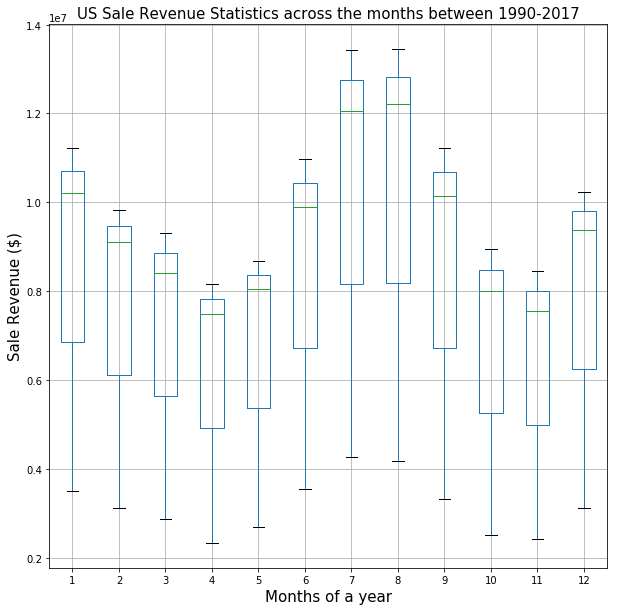

In [21]:
# distribution of the average revenue values across months with a year
revenue_bx = (pd.DataFrame(sale_revenue.groupby('month')['Revenue_dollar'].agg(['mean','median','std']))).reset_index()
revenue_bx.sort_values(by='month', axis=0, ascending=True)
revenue_bx.set_index('month', inplace=True)

# Transpose the index to columns
revenue_bp = revenue_bx.T

# ploting the the data
fig, ax = plt.subplots(figsize=(10,10))
revenue_bp.boxplot()

ax.set_xlabel('Months of a year',fontsize =15)
ax.set_ylabel('Sale Revenue ($)',fontsize =15)
ax.set_title('US Sale Revenue Statistics across the months between 1990-2017',fontsize =15)


This figure displays the sale revenue statistics of each month.The monthly revenue from electric sale was appeared to show a sin-wave trend with peaks and troughs with time. The minimum and maximum revenues were different from month to month.The avergale sale revenue was higher in the months of July and August followed by January, September and June. April and November were the ones with low revenues. The weather conditions could be one of the factors that happened to manipulate the monthly revenue difference, however further research should be done to have a concrete conclusion.

### Checking the Stationarity, Trend and Seasonality in the dataset

When we visualize our time series dataset, it is recommended to look out for few things. The main areas that should be observe are the seasonality, trend and noise in the dataset. Are we seeing any clearn periodic pattern in the data; does the data show a consistent trend either upward or downward; is the data have any outlier points which are not consistent with the rest of the data. 
Based on the above plots, it is clear evident that there is an overall increasing trend with some monthly/seasonal variations. Let us do formal analysis on the stationarity of the dataset.

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  if __name__ == '__main__':


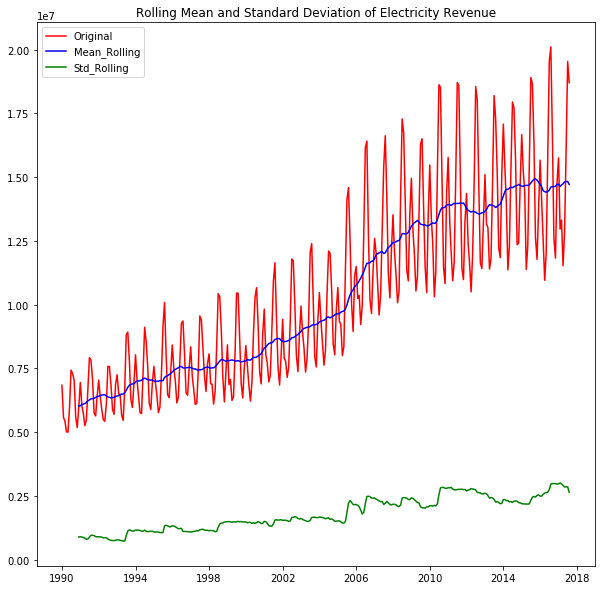

In [11]:
# Setting the dataframe index
data_revenue_final = data_revenue.set_index('year_month')
# data_revenue.index = pd.to_datetime(data_revenue.index)
# A = data_revenue.groupby(TimeGrouper('A'))

# Let us check the stationarity using rolling statistics 

rollmean_revenue = pd.rolling_mean(data_revenue_final, window = 12)
rollstd_revenue = pd.rolling_std(data_revenue_final, window = 12)

# Plotting the statistics results
fig,ax = plt.subplots(figsize=(10,10))

ax.plot(data_revenue_final, color='red',label='Original')
ax.plot(rollmean_revenue, color='blue',label='Mean_Rolling')
ax.plot(rollstd_revenue, color='green',label='Std_Rolling')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation of Electricity Revenue')

In [12]:
# Applying to Dickey-Fuller test results to check stationarity

stat_test = adfuller(data_revenue_final['Revenue_dollar'], autolag = 'AIC')
Output = pd.Series(stat_test[0:4], index = ['Test Statistic','p-value','number of Lags use','Number of observations used'])
print(Output)
print('Critical value at:')

for key,value in stat_test[4].items():
    print (key,value)


Test Statistic                  -0.425902
p-value                          0.905683
number of Lags use              12.000000
Number of observations used    319.000000
dtype: float64
Critical value at:
1% -3.45101677515
5% -2.87064334231
10% -2.57162017443


The plot shows that the mean of this time series data does not look constant and stationary, though the standard deviation variation looks small. As it can also be observed in the statistics summary, the test statistics is greater than the critical value at 1% or 5% and the p-value is appeared to be greater than 0.05 threshold. These results imply that it is much less likely to reject the null hypothesis and the time series is non-stationary. Therefore, we need to do log transform the dataset inorder to make the distribution value more linear and better.

### Initial Findings

Based on the above explanatory data analysis, the average monthly electricity sale revenue varied from month to month, showing a kind of sine-wave pattern and a little bit asymmetrical distribution. Morever, the time series was proved to be non-stationary. The next step is not to carry out log transform in the dataset. Later, statistical and machine learing models will be applied to preceed with our predictions.